In [24]:
#Importing Libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
# How to display dataset with all columns 
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.max_rows', None)


In [26]:
# Load dataset
df = pd.read_csv('/Users/macbook/Downloads/car_prices.csv')


In [27]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [29]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


Above 3 cells gives brief information about our dataset.Therefore from the function info(), we can observe that there are some NaN and null values in some rows

In [30]:
#Cleaning Data
df.isna().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [31]:
df = df.dropna()

In [32]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000
mean,2010.210980,30.774177,66701.732040,13837.058964,13690.512058
std,3.822151,13.286866,51939.586894,9532.229273,9613.033738
min,1990.000000,1.000000,1.000000,25.000000,1.000000
25%,2008.000000,24.000000,28137.000000,7425.000000,7200.000000
50%,2012.000000,35.000000,51085.000000,12300.000000,12200.000000
75%,2013.000000,41.000000,96590.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 472325 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          472325 non-null  int64  
 1   make          472325 non-null  object 
 2   model         472325 non-null  object 
 3   trim          472325 non-null  object 
 4   body          472325 non-null  object 
 5   transmission  472325 non-null  object 
 6   vin           472325 non-null  object 
 7   state         472325 non-null  object 
 8   condition     472325 non-null  float64
 9   odometer      472325 non-null  float64
 10  color         472325 non-null  object 
 11  interior      472325 non-null  object 
 12  seller        472325 non-null  object 
 13  mmr           472325 non-null  float64
 14  sellingprice  472325 non-null  float64
 15  saledate      472325 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 61.3+ MB


In [34]:
# Finding correlation between columns in dataset

df_corr = df[['year', 'transmission', 'sellingprice', 'mmr']]
df_corr['transmission'] = df_corr['transmission'].apply(lambda x: 0 if x == 'manual' else 1)
df_corr.head()


/var/folders/_y/8h8m2xr94gzg4cg2vf82rwzw0000gn/T/ipykernel_54249/1411415958.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['transmission'] = df_corr['transmission'].apply(lambda x: 0 if x == 'manual' else 1)


,year,transmission,sellingprice,mmr
0,2015,1,21500.0,20500.0
1,2015,1,21500.0,20800.0
2,2014,1,30000.0,31900.0
3,2015,1,27750.0,27500.0
4,2014,1,67000.0,66000.0


In [35]:
df_corr = df_corr.corr()


<Axes: >

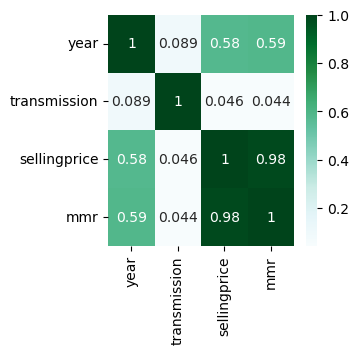

In [36]:
plt.figure(figsize = (3 ,3))
# A new figure is created using the 'figure()' function from the 'matplotlib.pyplot' module.
# The 'figsize' argument determines the dimensions of the created figure.

sns.heatmap(data = df_corr, annot = True, cmap = 'BuGn')
# The 'heatmap()' function from the 'seaborn' library is called.
# This function is used to visualize a correlation matrix as a heat map.

# 'annot = True:' Allows the correlation coefficient values ​​to be written inside the squares.
# 'cmap='BuGn'': Determines the color map.

Each square gives correlation of combined two unique columns. Values of correlation is in the interval of [-1,1]. It means that they have better relation between each other as the value goes to 1.0

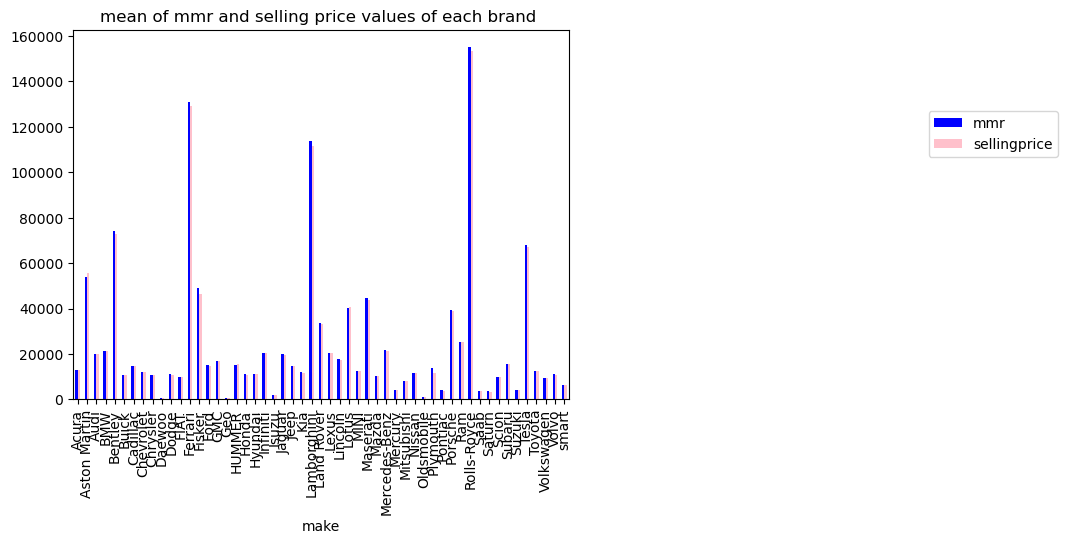

In [37]:
df.groupby("make")[[ "mmr", "sellingprice"]].mean().plot(kind = "bar", color = ['blue', 'pink', 'purple'], align = 'center')

plt.legend(bbox_to_anchor = (2.0, 0.8))
plt.title("mean of mmr and selling price values of each brand ")
plt.show()

In [38]:
df.groupby(['make','color'])["make"].count()


make           color    
Acura          beige           33
               black         1253
               blue           281
               brown           15
               burgundy       106
               charcoal         4
               gold            94
               gray           967
               green           72
               off-white       28
               orange           2
               purple           8
               red            148
               silver         726
               turquoise        2
               white          711
               —               53
Aston Martin   black           11
               blue             2
               charcoal         1
               gray             5
               green            1
               silver           2
               white            1
               —                1
Audi           beige           36
               black         1490
               blue           445
               brown   

In [39]:
df = df.drop(columns=['vin', 'model' , 'trim' , 'state' , 'transmission' , 'make' , 'body' , 'color' , 'interior' , 'saledate' , 'seller'])


In [40]:
# Define features and target
X = df[['year', 'mmr', 'condition', 'odometer']]
y = df['sellingprice']


In [41]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [43]:
# Predictions
y_pred = model.predict(X_test)


In [44]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 2633779.7713868353
R^2 Score: 0.9710223249491007


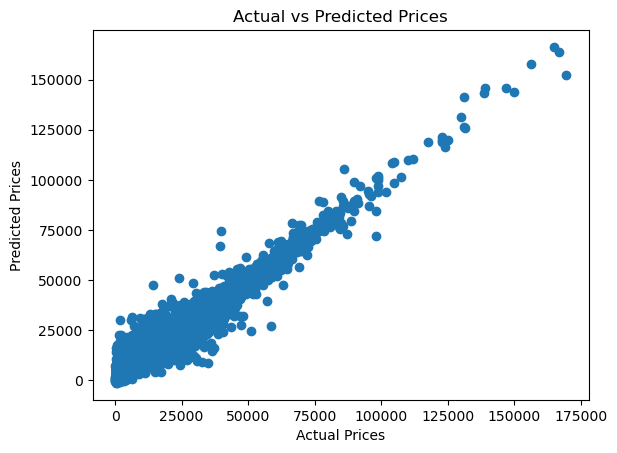

In [45]:
# Plot actual vs predicted
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()
